In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Using Label Encoder to convert the object type variables into numerical type


In [3]:
col_name_objects = df.select_dtypes(include=['object']).columns.values
col_name_objects

array(['GENDER', 'LUNG_CANCER'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in col_name_objects:
  df[col] = LE.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [5]:
x_ind = df.drop('LUNG_CANCER', axis = 1)
y_dep = df.LUNG_CANCER

In [6]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = 0.2,random_state=2)

In [7]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [8]:
model=Sequential()

In [9]:
#first hidden layer
model.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=15))
#second hidden layer
model.add(Dense(units=50,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,701
Trainable params: 6,701
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model1 = model.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 5.4612 - accuracy: 0.1377
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7874 - accuracy: 0.8785
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 1.5244 - accuracy: 0.8785
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1.8268 - accuracy: 0.8785
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 1.8737 - accuracy: 0.8785
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 1.7363 - accuracy: 0.8785
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 1.4810 - accuracy: 0.8785
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0900 - accuracy: 0.8785
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.8785
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6721
Epoch 11/100
3/3 [===========

In [14]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

CONFUSION MATRIX AND ACCURACY

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
cnf=confusion_matrix(y_test,y_pred)

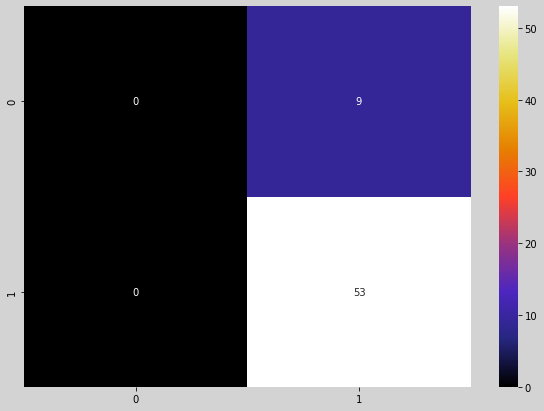

In [17]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='CMRmap');
plt.show()

In [18]:
accuracy_score(y_test,y_pred) * 100

85.48387096774194